# Wine Quality Prediction using Machine Learning

# Data Source
The dataset is taken from "https://www.kaggle.com/code/nicoletacilibiu/wine-quality-prediction/input"

In [2]:
import pandas as pd
#Loading the dataset
wine_data = pd.read_csv('WineQuality.csv')
wine_data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [3]:
# To determine Descriptive Statistics
wine_data.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,3251.548376,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1873.780954,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1627.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,4875.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Data Preprocessing

In [4]:
# Features List
features = wine_data.columns.drop(['Unnamed: 0', 'quality'])
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Type'],
      dtype='object')

In [5]:
# Drop the unnamed column
wine_data.drop(columns=['Unnamed: 0'], inplace=True)
#Checking for null values
null_values = wine_data.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Separate the features and the target variable
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']
# Standardize the numeric features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])
# One-hot encode the 'Type' feature
X = pd.get_dummies(X, columns=['Type'], drop_first=True)
# Display the first few rows of the processed data
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type_White Wine
0,0.141618,-1.031607,-0.195139,-0.841545,-0.261102,-0.423577,-0.153330,-0.271528,1.863943,0.796858,-0.067773,True
1,-1.463647,-0.182657,0.424908,1.054626,-0.724843,1.280213,0.431204,-0.500359,0.748965,-0.480802,1.024074,True
2,-1.922294,-1.183206,-0.195139,-0.924893,-0.406021,0.257939,-0.454454,-1.299610,3.350580,-0.279066,0.688121,True
3,-0.240588,-0.485854,-0.195139,-0.258108,-0.377038,0.144353,-0.029338,-1.498594,-0.366013,-1.489481,1.695980,True
4,-0.622794,0.666293,-1.710810,-0.904056,-0.753827,-1.161886,0.271785,-1.399102,-1.542935,-1.691217,0.268180,True


# Exploratory Data Analysis

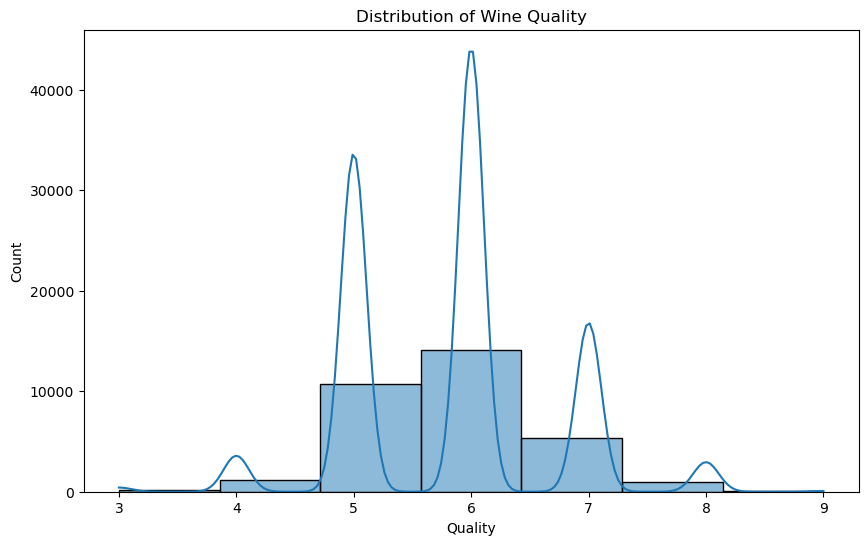

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting histogram for the 'quality' variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=7)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

The histogram showcases the distribution of wine quality. Most wines have a quality rating of 5 or 6, which seems to be the most common. Few wines achieve a quality rating of 3 or 9, making these the extremes in the dataset.

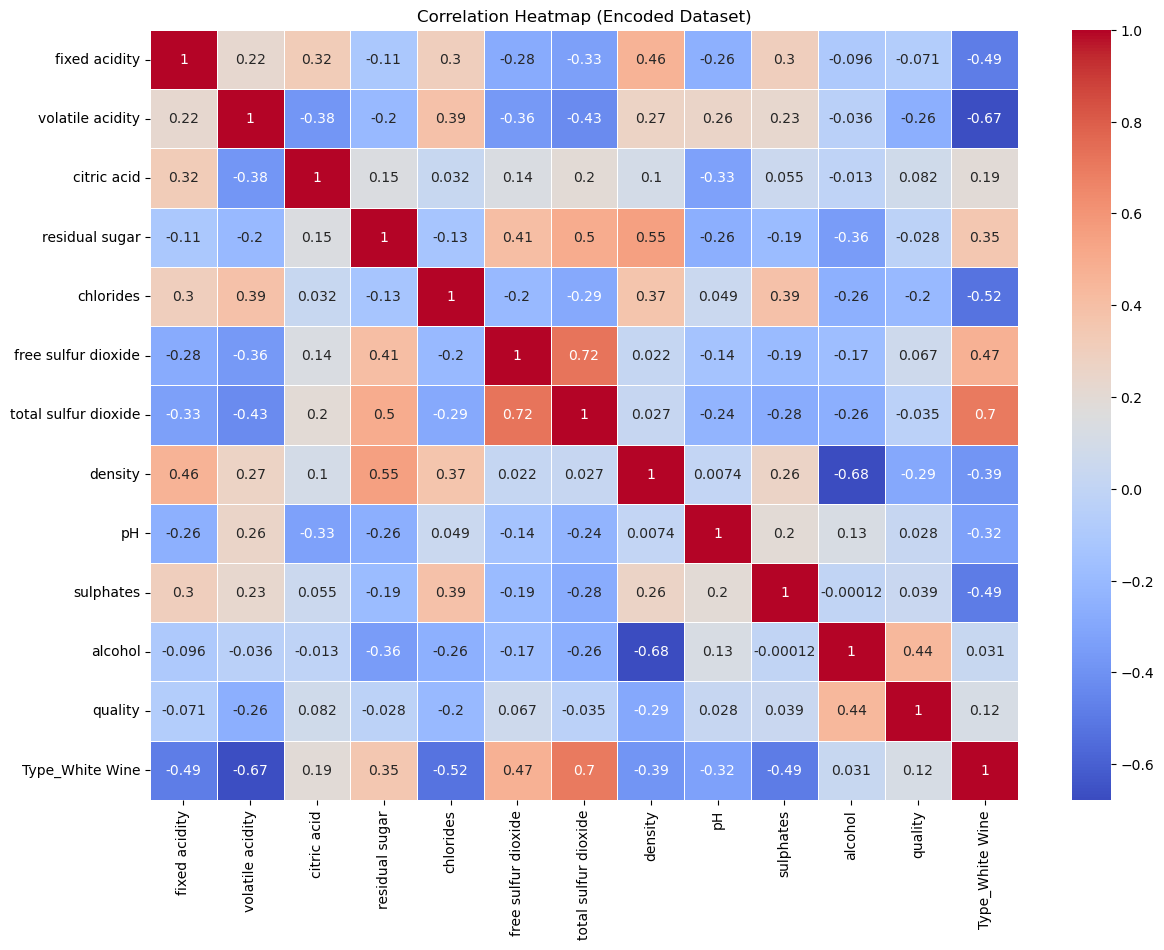

In [10]:
# Encoding the 'Type' column in the original dataset
wine_data_encoded = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)
# Compute the correlation matrix for the encoded dataset
correlation_matrix_encoded = wine_data_encoded.corr()
# Plotting heatmap for the encoded dataset
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Encoded Dataset)')
plt.show()

The correlation heatmap provides insights into the relationships between features and the target variable, as well as the inter-relationships among the features themselves:

- Quality and Alcohol: The higher the alcohol content, the better the wine’s quality.
- Quality and Volatile Acidity: A distinct negative relationship is observed with higher volatile acidity apparently being linked with relatively lower wine quality.
- Density and Residual Sugar: The first one relates to alcoholic content while the latter to density is positively correlated between themselves as expected because sugar does add to the weight of wine.
- Some other aspects have different levels of correlation with themselves and with the quality.

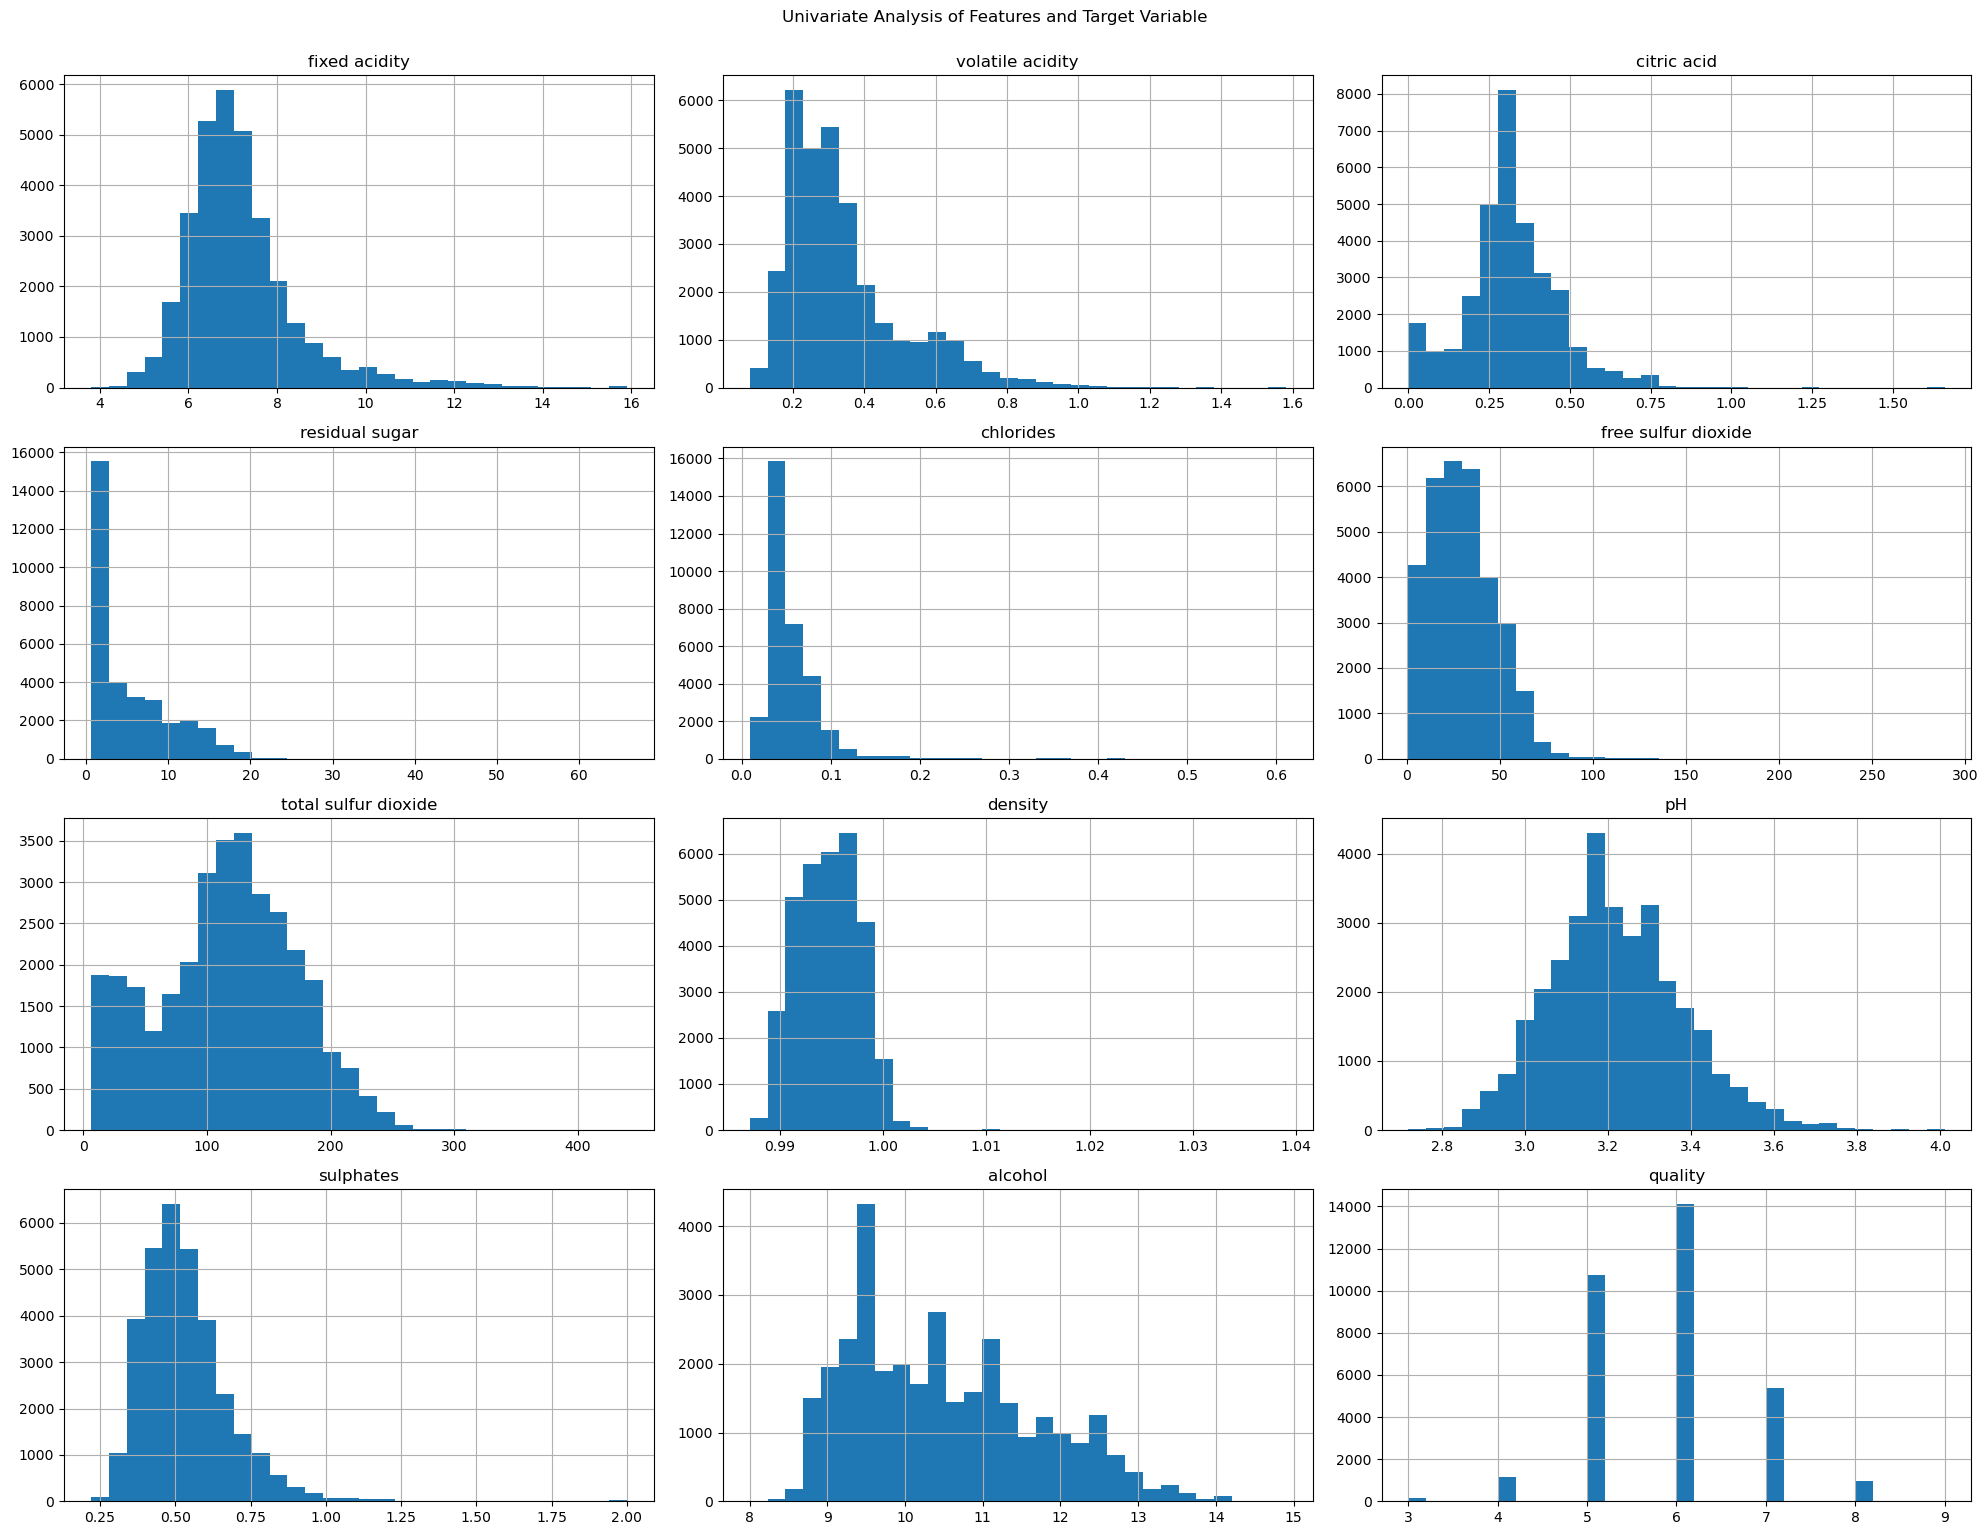

In [21]:
# Univariate Analysis
# Plotting histograms for all features and the target variable
wine_data_encoded.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.suptitle('Univariate Analysis of Features and Target Variable', y=1.02)
plt.show()

The histograms provide a univariate analysis of each feature and the target variable:

- Fixed Acidity, Citric Acid, Density, etc.: These show approximately normal or slightly skewed distributions.
- Residual Sugar, Free and Total Sulfur Dioxide: These show right-skewed distributions.
- Quality: Most wines have a quality rating of 5 or 6, with fewer wines at the extremes of the quality scale.
- Type_White Wine: This is a binary variable representing whether the wine is a white wine or not.
- Next, let's identify the three features that are most strongly correlated with the target variable "quality" and plot them against "quality" for bivariate analysis.

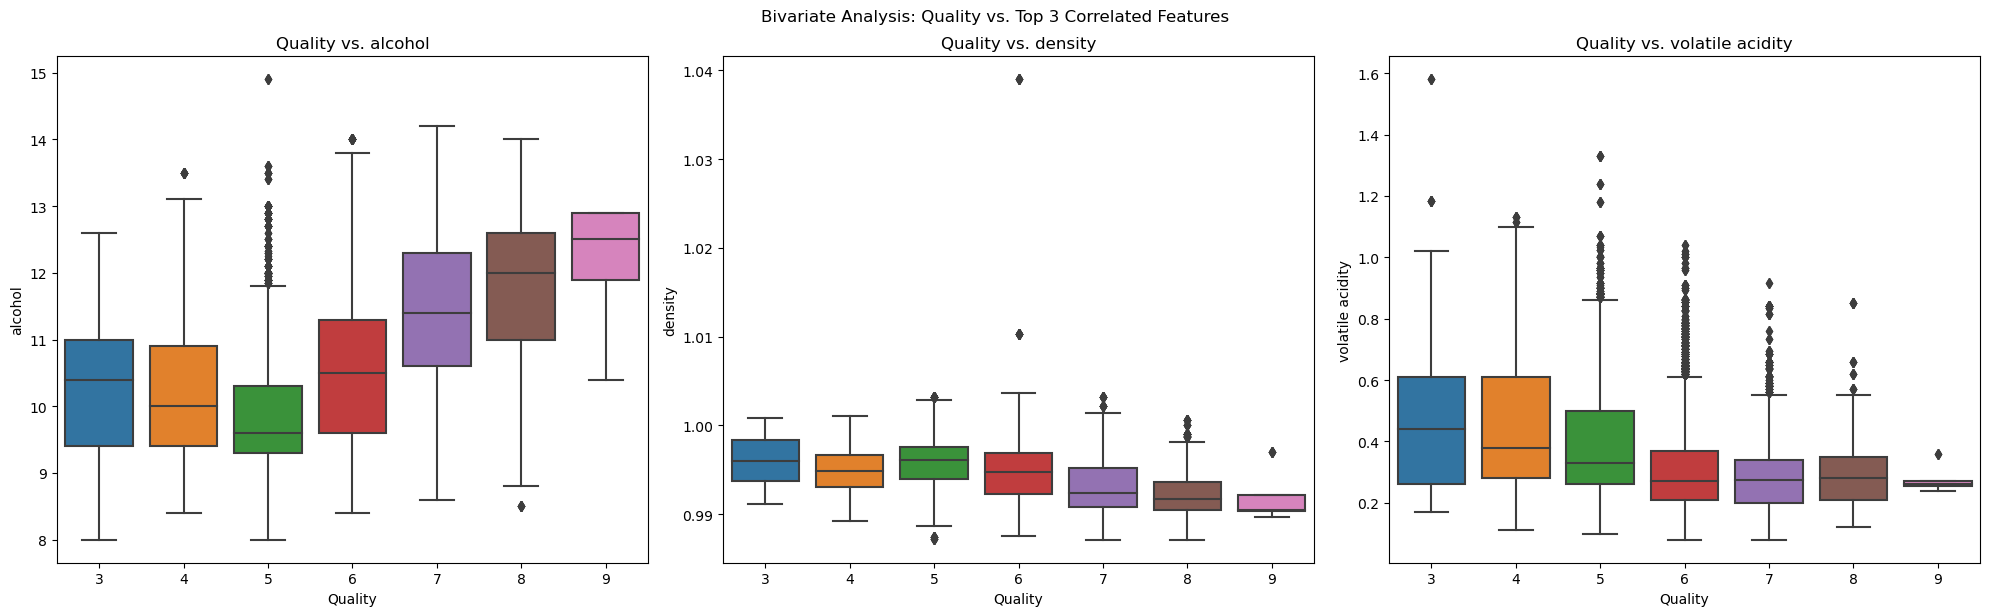

In [22]:
# Extracting top 3 features most correlated with 'quality'
top_correlated_features = correlation_matrix_encoded['quality'].abs().nlargest(4).index[1:]
# Bivariate Analysis: Plotting the top 3 correlated features against 'quality'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for i, feature in enumerate(top_correlated_features):
    sns.boxplot(x='quality', y=feature, data=wine_data_encoded, ax=axes[i])
    axes[i].set_title(f'Quality vs. {feature}')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Quality')
plt.tight_layout()
plt.suptitle('Bivariate Analysis: Quality vs. Top 3 Correlated Features', y=1.02)
plt.show()

The boxplots illustrate the bivariate relationship between wine quality and the top three features most correlated with it:

- Alcohol: It appears this has a positive relationship to the quality of wine. Generally, higher quality wines are associated with increased levels of alcohol.
- Volatile Acidity: This is reflected by negative correlations between wines of lower volatile acidity and those scoring higher in quality rating.
- Density: Here, however, the relationship is more complicated – denser wines with higher quality ratings are slightly less dense.
- Such information is vital in determining what drives wine quality.

# Data Splitting:
We'll start by splitting the data into training and test sets. This will allow us to train our model on one subset and test its performance on another unseen subset.

In [11]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25988, 12), (6497, 12), (25988,), (6497,))

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Train a Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_model.fit(X_train, y_train_class)
logreg_predictions = logreg_model.predict(X_test)

In [51]:
# Evaluate the Logistic Regression classifier
logreg_accuracy = accuracy_score(y_test_class, logreg_predictions)
logreg_classification_report = classification_report(y_test_class, logreg_predictions)
print(f"Accuracy: {logreg_accuracy:.4f}")

Accuracy: 0.7527


In [ ]:
The logistic regression has achieved an accuracy of 75.27% 

# KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# Train a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors for demonstration
knn_classifier.fit(X_train, y_train_class)
knn_predictions = knn_classifier.predict(X_test)

In [54]:
# Evaluating the k-NN Classifier
knn_accuracy = accuracy_score(y_test_class, knn_predictions)
knn_classification_report = classification_report(y_test_class, knn_predictions)

In [57]:
print(f"Accuracy: {knn_accuracy:.4f}")

Accuracy: 0.9532


In [58]:
# Print metrics for comparison
print("Metrics for Logistic Regression:")
print("----------------------------------------------")
print(f"Accuracy: {logreg_accuracy:.4f}")
print("\nClassification Report:\n", logreg_classification_report)
print("\n")

print("Metrics for k-NN Classifier:")
print("---------------------------")
print(f"Accuracy: {knn_accuracy:.4f}")
print("\nClassification Report:\n", knn_classification_report)


Metrics for Logistic Regression:
----------------------------------------------
Accuracy: 0.7527

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.57      0.64      2464
           1       0.77      0.86      0.81      4033

    accuracy                           0.75      6497
   macro avg       0.74      0.72      0.72      6497
weighted avg       0.75      0.75      0.75      6497



Metrics for k-NN Classifier:
---------------------------
Accuracy: 0.9532

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2464
           1       0.96      0.97      0.96      4033

    accuracy                           0.95      6497
   macro avg       0.95      0.95      0.95      6497
weighted avg       0.95      0.95      0.95      6497



# Observations

The k-NN classifier achieves a higher accuracy and better precision, recall, and F1-score values compared to the Logistic Regression model on this dataset.

The accuracy of a model provides a general measure of how well it predicts the correct classifications on a given dataset. However, accuracy alone might not always provide a comprehensive understanding of a model's performance, especially in cases where the classes are imbalanced. In your dataset:

- Logistic Regression Accuracy: 75.27%
- k-NN Classifier Accuracy: 95.32%

# Conclusion

In conclusion, while the k-NN classifier shows superior performance in terms of accuracy and other metrics on this dataset, the choice of model in practice should also consider factors like interpretability, computational efficiency, and the specific objectives of the analysis.

# References

(1)Anami, B. S., Mainalli, K., Kallur, S., & Patil, V. (2022). A machine learning
based approach for wine quality prediction. 2022 2nd Asian Conference on
Innovation in Technology (ASIANCON).

https://doi.org/10.1109/asiancon55314.2022.9908870

(2)Trivedi, A., & Sehrawat, R. (2018). Wine Quality Detection through Machine Learning
Algorithms. Wine Quality Detection Through Machine Learning Algorithms.

https://doi.org/10.1109/icrieece44171.2018.9009111

(3)Rachman, M. A. (2023, July 14). Wine Quality Prediction with Machine Learning Model.
Medium.

https://medium.com/@m.ariefrachmaann/wine-quality-prediction-with-machine-learning-model-
10c29c7e3360

(4)Gamboa, J. C. R., E, E. S. A., Da Silva, A. J., & Ferreira, T. a. E. (2020). Wine quality rapid detection using a compact electronic nose system: application focused on spoilage. 

https://www.researchgate.net/publication/338687908_Wine_quality_rapid_detection_using_a_compact_electronic_nose_system_application_focused_on_spoilage_thresholds_by_acetic_acid![image.png](attachment:image.png)

(5)MyDataModels. (2022, November 14). Predicting aging wine Quality | MyDataModels. 

https://www.mydatamodels.com/solutions/predicting-aging-wine-quality/

# Future Scope

(1)Prediction Wine Age: I would aim to improve it by introducing forecasting models that can describe wine aging quality potential. Specifically, these models are designed based on historical information about composition as well as aging conditions to advise both winemakers and consumers when they need to drink a bottle at its best. Moreover, it maximizes aging processes in favor of production choices that cater to customer’s needs by promoting prime quality wine experiences.

(2)Quality Assurance and Sopilage identification:I would like to include a reliable quality control and deterioration detection feature to my project. The goal is to proactively detect early indicators of spoilage and quality defects, such as unpleasant odors, contaminants, and changes in color in wines, with the help of machine learning models. Vineyards would consider this as an invaluable tool as it will allow them to determine hazardous groups early in the production process, ensuring high standards of quality. In order to sustain the quality and esteem of wines, assurance of quality and rotting detection serve as vital tasks. 

The inclusion of these parts to my project would meet the demands of consumers, winemakers, and wine enthusiasts as well as effectively satisfying the requirements of the wine sector. This add-on unveils our wine quality prediction as a full-featured tool that embraces wine aging along with quality assurance.
